<a href="https://colab.research.google.com/github/ferrarimarlon/PDFtoGPT/blob/main/FuncaoPDFOrgGenIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando um buscador de PDFs com IA Generativa

## Teste o projeto no Hugginface: https://huggingface.co/spaces/ferrarimarlon/PDFtoGPT

## 1. Instalação dos pacotes

In [ ]:
!pip install PyMuPDF

##2. Processamento de documentos

In [ ]:
import fitz

def formatar(texto):
    texto = texto.replace('\n', ' ')
    return texto

def pdf_para_lista(documento):
    conteudo = fitz.open(documento)
    total_paginas = conteudo.page_count
    lista_conteudo = []
    #lê da primeira página à última
    for i in range(0, total_paginas):
        # pega todo o texto da página
        texto = conteudo.load_page(i).get_text("text")
        texto = formatar(texto)
        # adiciona o indicador de numeração da páginas
        pagina = 'Página '+str(i+1)+' - '
        lista_conteudo.append(pagina+texto)

    conteudo.close()
    return lista_conteudo

### 2. Escolha do modelo GPT

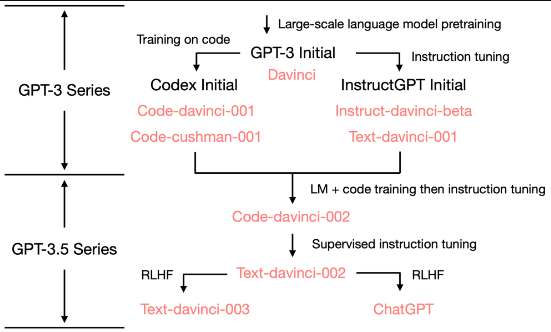

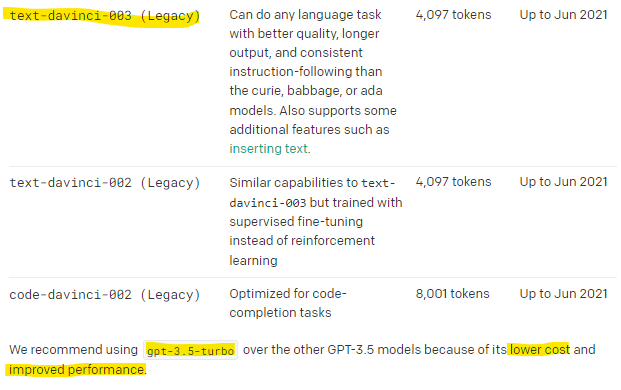

**davinci003** = pdf+instruções+pergunta (tudo no mesmo texto)

**gpt3.5Turbo** = separação por roles

In [ ]:
!pip install openai

In [ ]:
import openai
openAI_key = 'sua_chave_openai'

In [ ]:
openai.api_key = openAI_key

In [ ]:
base_texto = pdf_para_lista('seuPDF.pdf')
prompt = ""
# adiciona uma quebra de linha para cada página
for c in base_texto:
    prompt += c + '\n\n'

In [ ]:
prompt

In [ ]:
pergunta = 'Sua pergunta aqui'

In [ ]:
completion = openai.ChatCompletion.create(
  model = 'gpt-3.5-turbo',
  messages = [
    {'role': 'assistant', 'content': prompt},
    {'role': 'user', 'content': pergunta},
    {'role': 'system', 'content':'Retorne apenas texto contido no resultado. Retorne o número da página de cada resultado no formato [Página].'}
  ],
  temperature = 0
)

In [ ]:
print(completion['choices'][0]['message']['content'])